# Actividad individual 1. Clasficación no supervisada.

## Introduccion. Cargar el csv. 
Para este problema de clasificación no supervisada he eligido un dataset de alimentos y sus propiedades nutritivas.

In [1]:
import pandas as pd
df = pd.read_csv('NutritionalFacts_Fruit_Vegetables_Seafood.csv', encoding = "ISO-8859-1", header = 0)
df.head()

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,NaN,NaN,NaN,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg)Ê,(%DV),(mg)Ê,NaN
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."
4,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."


Antes que nada voy a ver una lista de todas las columnas, y el tipo de dato que ha importado `pandas`

In [2]:
df.dtypes

Food and Serving          object
Calories                 float64
CaloriesÊfrom Fat        float64
Total Fat                 object
Total Fat.1               object
Sodium                    object
Sodium.1                  object
Potassium                 object
Potassium.1               object
Total Carbo-hydrate       object
Total Carbo-hydrate.1     object
Dietary Fiber             object
Dietary Fiber.1           object
Sugars                    object
Protein                   object
Vitamin A                 object
Vitamin C                 object
Calcium                   object
ÊÊIronÊÊ                  object
Saturated Fat             object
Saturated Fat.1           object
Chole-sterol              object
Chole-sterol.1            object
Food Type                 object
dtype: object

Casi todas las columnas se han importado con el formato generico de `pandas`. Esto es debidoa a que la primera fila, que contiene los campos de unidades, imposibilita la conversion de esas columnas a formato numerico. Si evitamos la  la lectura de esta primera fila:

In [3]:
# eliminamos la fila de las unidades
df1 = df.drop( df.index[0])

# trasformamos dataframe
cols = df.columns.tolist()
for col in cols:
    try:
        df1[col] = df1[col].apply(pd.to_numeric)
    except:
        print(f'{col} no es tipo numerico')
        next

Food and Serving no es tipo numerico
Food Type no es tipo numerico


Tiene sentido, ya que las columnas *Food and Servingson* y *Food Type* son texto. 

Si ahora revisamos el dataframe, la conversion de la columnas ha sido exitosa. 

In [4]:
df1.dtypes

Food and Serving          object
Calories                 float64
CaloriesÊfrom Fat        float64
Total Fat                float64
Total Fat.1                int64
Sodium                     int64
Sodium.1                   int64
Potassium                  int64
Potassium.1                int64
Total Carbo-hydrate        int64
Total Carbo-hydrate.1      int64
Dietary Fiber            float64
Dietary Fiber.1          float64
Sugars                   float64
Protein                    int64
Vitamin A                  int64
Vitamin C                  int64
Calcium                    int64
ÊÊIronÊÊ                   int64
Saturated Fat            float64
Saturated Fat.1          float64
Chole-sterol             float64
Chole-sterol.1           float64
Food Type                 object
dtype: object

## Selección de datos para el cluster y limpieza

He elegido las columnas de `Calorias, Total Fat (g), Protein (g)`. En una primera aproximación elegi la columna de `Food Type`, y descubri que un ejercicio de cluster con variales de tipo texto complicaba muchisimo el analisis, ya que tendria que reducirlas a variables categóricas y aun así el analisis era demasiado complejo. 

In [5]:
df2 = df1[['Food and Serving', 'Calories', 'Total Fat', 'Protein']]
df2.head()

,Food and Serving,Calories,Total Fat,Protein
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,2
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,1
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.5,4
4,"Carrot, 1 carrot, 7"" long,Ê1 1/4"" diameter (78...",30.0,0.0,1
5,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25.0,0.0,2


Los datos que introduciremos en el cluster seran solo las propiedades de cada alimento.

In [85]:
clmns = [ 'Calories', 'Total Fat', 'Protein']
df_cluster = df1[clmns]

## Gestion de missing values y NaN

In [86]:
df_cluster.isna().sum()

Calories     0
Total Fat    0
Protein      0
dtype: int64

Este dataframe que he llamada `df_cluster` está limpio de missing values, datos NaN o Inf.

# Exploración de datos

Para tener un poco más de visión del dataset, vamos a ver una descripción del mismo.

In [87]:
df_cluster.describe(include='all')

,Calories,Total Fat,Protein
count,61.000000,61.000000,61.000000
mean,72.540984,1.090164,7.655738
std,43.690416,1.954713,9.305707
min,10.000000,0.000000,0.000000
25%,25.000000,0.000000,1.000000
50%,80.000000,0.000000,1.000000
75%,100.000000,1.500000,17.000000
max,200.000000,10.000000,27.000000


Aqui podemos ver que el rango de valores que toman las variables es muy diferente. Mientras que las `Calories` pueden tomar valores entre 10 y 200, las grasas y proteinas solo de 0 a 10 y 27 respectivamente. Esto será importante tenerlo en cuenta cuando hagamos el estudio de cluster, ya que deberemos entandarizar el dataset.  

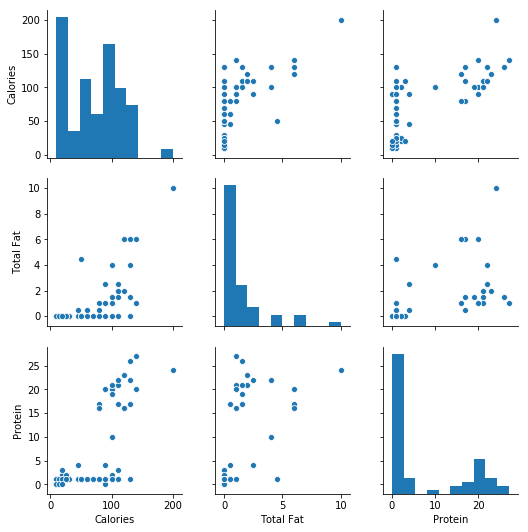

In [88]:
import seaborn as sns
sns.pairplot(df_cluster)

A la vista de los histogramas parece que:
- Vamos a encontrar alimentos bajos y ricos en proteinas.
- Los valores de grasas estan muy concetrados en valores menores a 5g.
- El muestreo para las calorias es más uniforme.

Además, si observamos los graficos de dispersion parece que no hay correlacion entre las variables escogidas. 

Vamos a mostrar un mapa de correlacion para asegurarnos.


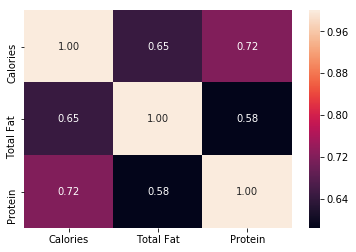

In [10]:
sns.heatmap(df_cluster.corr(), annot=True, fmt=".2f")

Ninguno de los valores se acerca a 0.9, efectivamente no hay correlacion entre las variables. 

# Cluster analisis. 

Veamos que resultados nos arroja el analisis de `KMeans Clustering` .

In [11]:
from scipy import stats
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt

Vamos a probar inicialmente a detectar los dos grupos que veiamos en el `pairplot` del apartado anterior, aquellos alimentos con bajo y alto contenido en proteinas. 

In [12]:
#Estandarizamos
df_tr_std = stats.zscore(df_cluster[clmns])

#Generamos el cluster 
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_
y_kmeans = kmeans.predict(df_tr_std)

#Asociamos esta informacion a los datos originales
df_cluster['2clusters'] = labels
clmns.extend(['2clusters'])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
# Revisamos los clusters
df_cluster[clmns].groupby(['2clusters']).mean()

,Calories,Total Fat,Protein
2clusters,,,
0,113.809524,2.714286,20.000
1,50.875000,0.237500,1.175


Efectivamente,  hay un cluster sobre alimentos más caloricos grasos y con alto contenido en proteinas,  y otro con alimentos más ligeros.

Si representamos proteinas frente a las grasas y las calorias podemos ver estos dos grupos muy bien diferenciados.

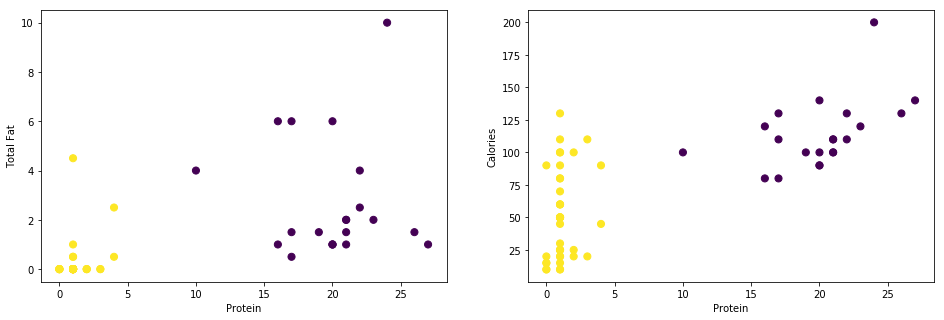

In [63]:
fig, axs = plt.subplots(1,2, figsize= (16,5))
df_cluster.plot.scatter('Protein', 'Total Fat', c = y_kmeans,
                        s=50, cmap='viridis', colorbar = False, ax= axs[0])
df_cluster.plot.scatter('Protein', 'Calories', c = y_kmeans,
                        s=50, cmap='viridis', colorbar = False, ax= axs[1])

## Estudio hierarquical clustering

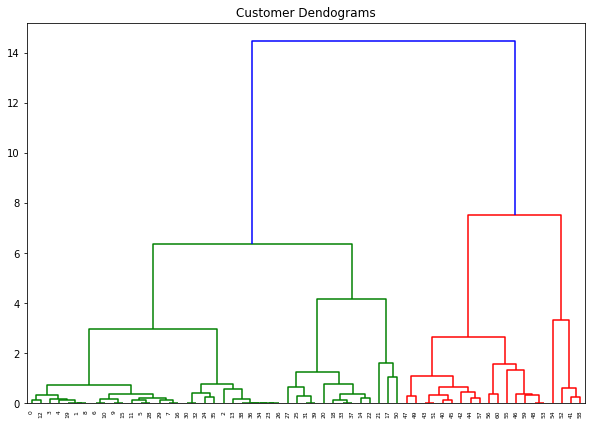

In [16]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_tr_std, method='ward'))

Aquí podemos ver que otro número de cluster interesante podria ser 4. Para obtener la informacion de cluster con el mismo metodo que usa el `hierarquical clustering`, utilizamos el mismo método: `ward`. 

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_pred = cluster.fit_predict(df_tr_std)
labels = cluster.labels_

df_cluster['4clusters'] = labels
clmns.extend(['4clusters'])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
df_cluster.groupby(['4clusters']).mean()

,Calories,Total Fat,Protein,2clusters
4clusters,,,,
0,94.615385,0.923077,2.076923,0.923077
1,147.500000,7.000000,19.250000,0.000000
2,106.250000,1.562500,20.812500,0.000000
3,32.321429,0.053571,1.071429,1.000000


En este nuevo cluster de 4 kernels, la tabla agrupada nos deja ver que el grupo con alto contenido en proteinas se ha divido en aquellos con bajo y alto valor en grasas. 

Si representamos esto podemos ver que el grupo con alto valor proteico está claramente diferenciado, representado ahora por puntos verdes y azules. 

En cambio, el grupo con bajo nivel de proteinas parece que no lo ha diferenciado bien. Si reresentamos Proteinas frente a Calorias veremos que el clustering si ha separado correctamente.

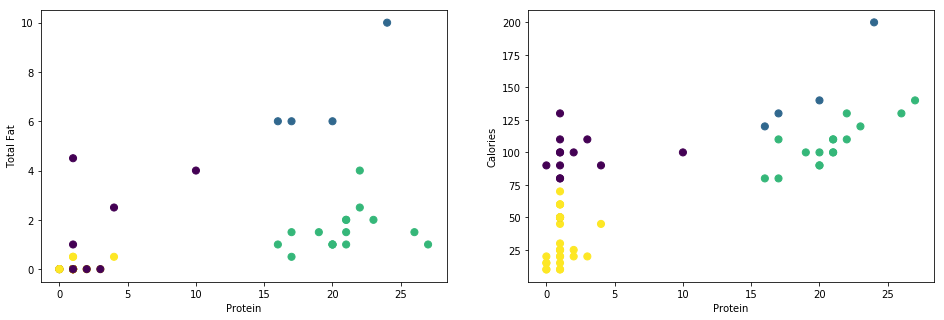

In [64]:
fig, axs = plt.subplots(1,2, figsize= (16,5))
df_cluster.plot.scatter('Protein', 'Total Fat', c = y_pred,
                        s=50, cmap='viridis', colorbar = False, ax= axs[0])
df_cluster.plot.scatter('Protein', 'Calories', c = y_pred,
                        s=50, cmap='viridis', colorbar = False, ax= axs[1])

Aunque para un alimento su contenido en proteinas y grasas sea similar, su contenido calorico puede difererir. Esto tiene sentido, ya que las calorias no son solo funcion de la cantidad de proteinas y grasas, otros nutrientes influyen.

### Extra: Clustermap
El paquete seaborn ofrece una visualizacion rápida de nuestro dataset como `clustermap`. 

Si no estandarizamos, el resultado es el siguiente, donde rápidamente se muestra que el rango de cada variable es muy diferente. La columna de Calorias tiene valores mucho mayores que el resto, predomina sobre las demás.

Es otra forma de ver la misma informacion que teniamos en el `pairplot`

El cluster obtenido es diferente al que hemos obtenido anteriormente., como cabía esperar. 

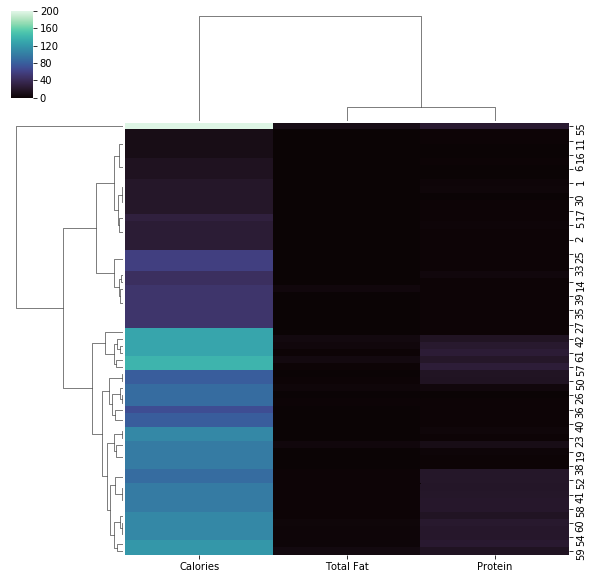

In [89]:
sns.clustermap(df_cluster.iloc[:,0:3], cmap="mako")

Una vez que estandarizamos: 

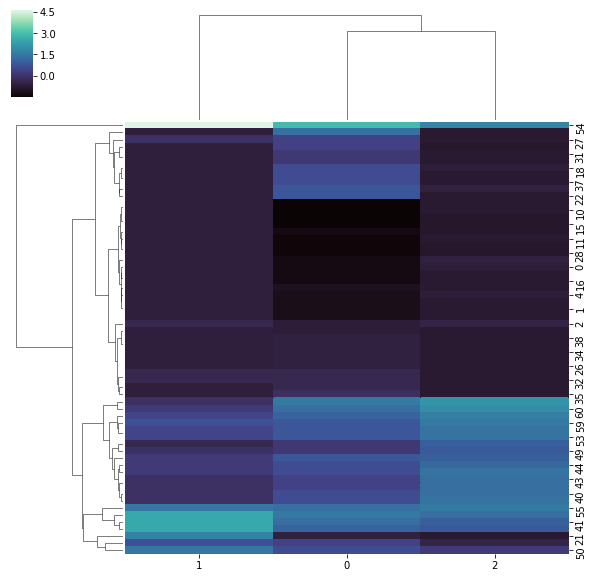

In [90]:
sns.clustermap(df_tr_std, cmap="mako")

### Extra:Elbow plot, determinar el numero k de clusters optimo 

Creo que es interesante para cuando nos enfrentemos a datasets más complejos.

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

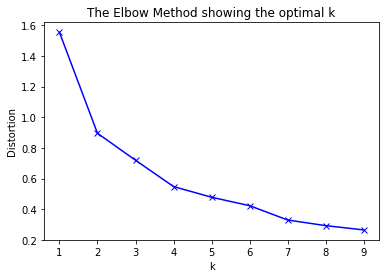

In [22]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
X= df_tr_std
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')